# Assignment # 1

## 1. Data Preprocessing

Import the `titanic.csv` dataset.

It contains data of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including whether they survived (considered as the class label), their age, their passenger-class (Pclass), their sex, ther number of their relatives and the fare they paid. 

Execute the following tasks:
- How many samples are in the dataset?
- What are the types of the attributes?
- Show the boxplots for the numeric attributes. Discuss the presence of outliers.
- Remove the outliers (if present) for the numeric attributes by using the IQR method.
- Apply normaxlization (minMax scaler) to the numeric attributes (excluding the class).
- convert the Sex attribute in a numeric one: replace `male` with 0 and `female` with 1.
- Select the data about the survived people vs not survived people. Is there imbalanced in the classes?
- Plot the scatter plot for the numeric attributes divided per classes (people vs not survived).
- Are the classes easly separable?
- By inspecting the scatter plots, are ther important attributes that allow an easy separation of the classes?
- Are there correlated features?

## 2. Distance Measures Between Data and K-NN Classification

Implement the `L1` and `L2` distances among the samples of the preprocessed `titanic.csv` dataset and perform a K-NNN classification. Look carefully at the feature and select the ones that are useful for computing a similarity. This task is similar to exercise 1 in Lab 2 but in this case you must avoid for loops.

The exercise requires the following tasks:

1. Remove from the dataset 5 samples of survived people and 5 of not survived ones and store in a Numpy array. These will be the test samples. The other part of the dataset is regarded as the training set.
2. write a `L1_distance` function that performs the `L1` distance among the test samples and all the samples in the training set. The output will be a `10 x n` distance matrix `DM` (`n` is the total number of samples in the trainig set) where each cell `DM[i, j]` contains the distance between the test sample with index `i` and the training sample with index `j`. Avoid for loops by using Numpy broadcasting as explained in Lab 2 and in the online notes.
3. Do the same of point 2 for `L2_distance`.
4. Given an index `i` of a test sample, return the classes of the top 5 samples more similar to `i`. This can be achieved by using the [argpartition](https://numpy.org/doc/stable/reference/generated/numpy.argpartition.html) or the [argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) Numpy functions. Then, consider the class of `i` as the majority class in the 5 top samples.
5. For each test sample `i` from 0 to 9, are the L1 and L2 functions able to return the same class of `i`?

In [172]:
import pandas as pd

titanic_df = pd.read_csv('titanic.csv')

titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## 1.

In [173]:
titanic_df.shape[0] # or len(titanic_df)

887

### 2.

In [174]:
titanic_df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

### 3.

<Axes: >

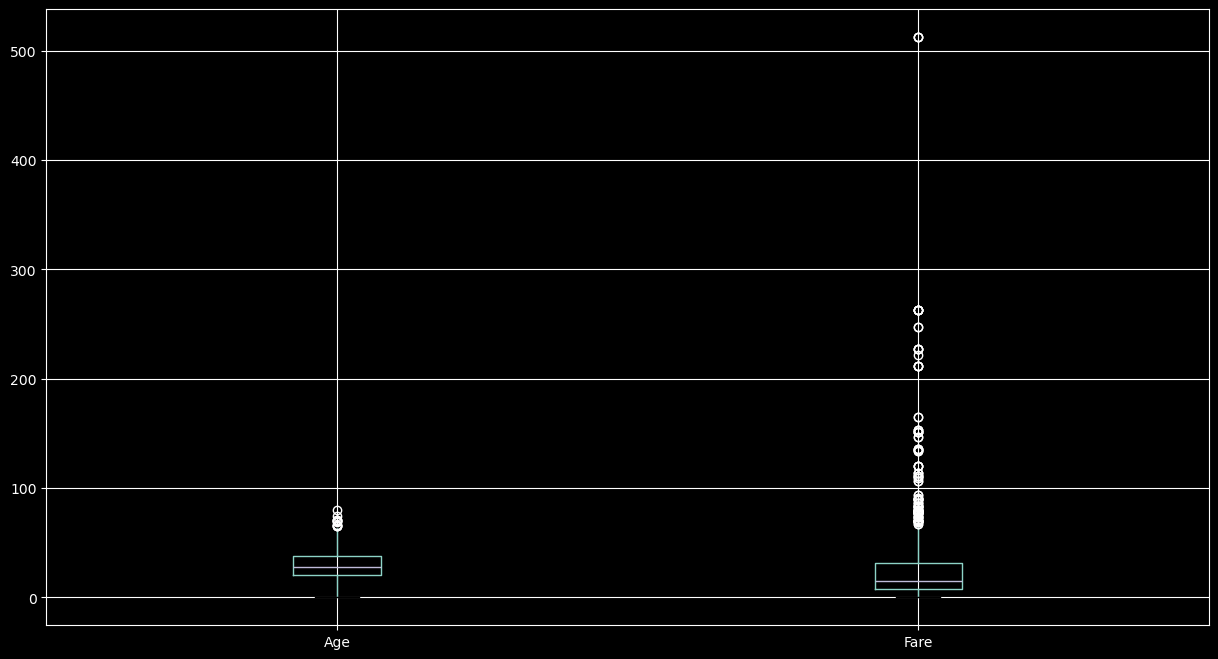

In [175]:
numeric_titanic_df = titanic_df.select_dtypes(include='number')

# we remove Pclass and Survived, because those are categorical, even if saved as numbers
numeric_titanic_df = numeric_titanic_df.drop(columns=['Pclass', 'Survived'])

numeric_attributes = numeric_titanic_df.columns.copy()
# we remove 'Siblings/Spouses Aboard' and 'Parents/Children Aboard' because the IQR outlier detecton dose not work with those
numeric_titanic_df = numeric_titanic_df.drop(columns=['Siblings/Spouses Aboard', 'Parents/Children Aboard'])

numeric_attributes_for_iqr = numeric_titanic_df.columns.copy()


numeric_titanic_df.boxplot(figsize=(15, 8))

### 4.

Num of samples before outlier cleaning: 887
Num of samples after outlier cleaning: 759


<Axes: >

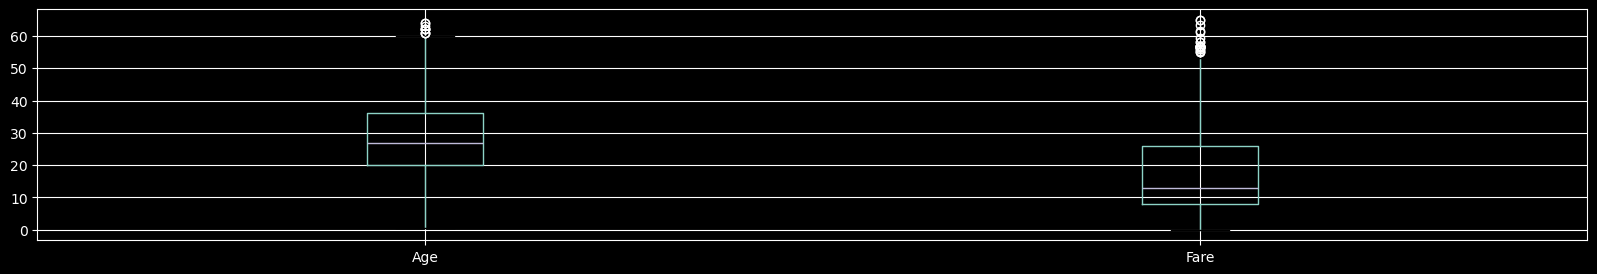

In [176]:
# Your code here
Q1 = numeric_titanic_df.quantile(0.25)
Q3 = numeric_titanic_df.quantile(0.75)
IQR = Q3 - Q1

numeric_titanic_df_no_outliers = numeric_titanic_df.loc[((Q1 - 1.5*IQR < numeric_titanic_df).sum(axis=1)==len(numeric_titanic_df.columns)) & ((numeric_titanic_df < Q3 + 1.5*IQR).sum(axis=1)==len(numeric_titanic_df.columns)), :]

print(f"Num of samples before outlier cleaning: {len(numeric_titanic_df)}")
print(f"Num of samples after outlier cleaning: {len(numeric_titanic_df_no_outliers)}")
numeric_titanic_df_no_outliers.boxplot(figsize=(20,3))

### 5.

In [177]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(titanic_df[numeric_attributes])

pd.DataFrame(X_train_norm)


,0,1,2,3
0,0.271174,0.125,0.000000,0.014151
1,0.472229,0.125,0.000000,0.139136
2,0.321438,0.000,0.000000,0.015469
3,0.434531,0.125,0.000000,0.103644
4,0.434531,0.000,0.000000,0.015713
...,...,...,...,...
882,0.334004,0.000,0.000000,0.025374
883,0.233476,0.000,0.000000,0.058556
884,0.082684,0.125,0.333333,0.045771
885,0.321438,0.000,0.000000,0.058556


### 6.

In [178]:
titanic_df_clean = titanic_df.copy()

scale_mapper = {'male': 0, 'female': 1}
titanic_df_clean['Sex'] = titanic_df_clean['Sex'].replace(scale_mapper)

titanic_df_clean.head()

/tmp/nix-shell.HA8lCC/ipykernel_56664/1088158885.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df_clean['Sex'] = titanic_df_clean['Sex'].replace(scale_mapper)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500


### 7.

In [179]:
survived_df = titanic_df_clean[titanic_df_clean['Survived'] == 1]
not_survived_df = titanic_df_clean[titanic_df_clean['Survived'] == 0]

print(f"Survived: {len(survived_df)}")
print(f"Not Survived: {len(not_survived_df)}")

print(f"Number of people in first class that survived: {len(survived_df[survived_df['Pclass'] == 1])}")
print(f"Number of people in first class that died: {len(not_survived_df[not_survived_df['Pclass'] == 1])}")
print(f"Number of people in not first class that survived: {len(survived_df[survived_df['Pclass'] != 1])}")
print(f"Number of people in not first class that died: {len(not_survived_df[not_survived_df['Pclass'] != 1])}")
percentage_died_first_class = len(not_survived_df[not_survived_df['Pclass'] == 1]) / len(titanic_df_clean[titanic_df_clean['Pclass'] == 1]) * 100
print(f"Percentage of people that died in first class: {percentage_died_first_class:.2f}%")
percentage_died_not_first_class = len(not_survived_df[not_survived_df['Pclass'] != 1]) / len(titanic_df_clean[titanic_df_clean['Pclass'] != 1]) * 100
print(f"Percentage of people that died not in first class: {percentage_died_not_first_class:.2f}%")


# clean_df = titanic_df_clean[['Survived', 'Pclass']]
# print(clean_df.value_counts())

Survived: 342
Not Survived: 545
Number of people in first class that survived: 136
Number of people in first class that died: 80
Number of people in not first class that survived: 206
Number of people in not first class that died: 465
Percentage of people that died in first class: 37.04%
Percentage of people that died not in first class: 69.30%


### 8.

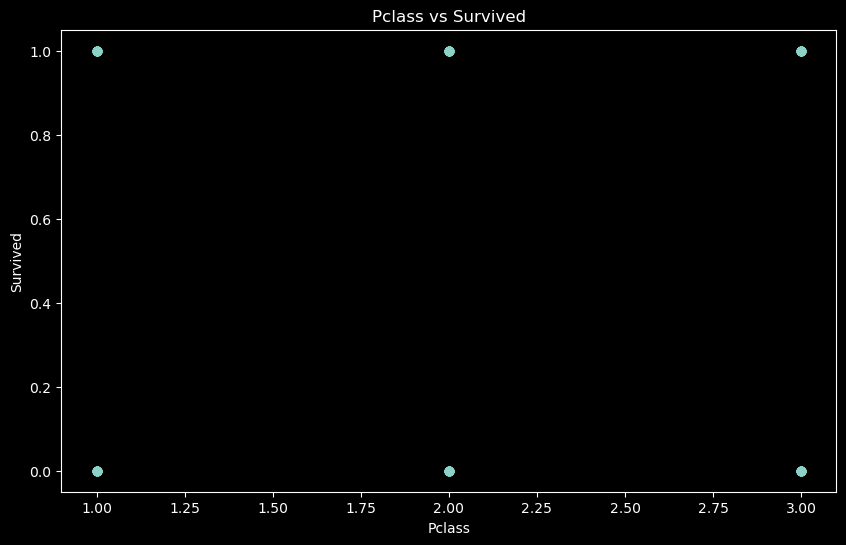

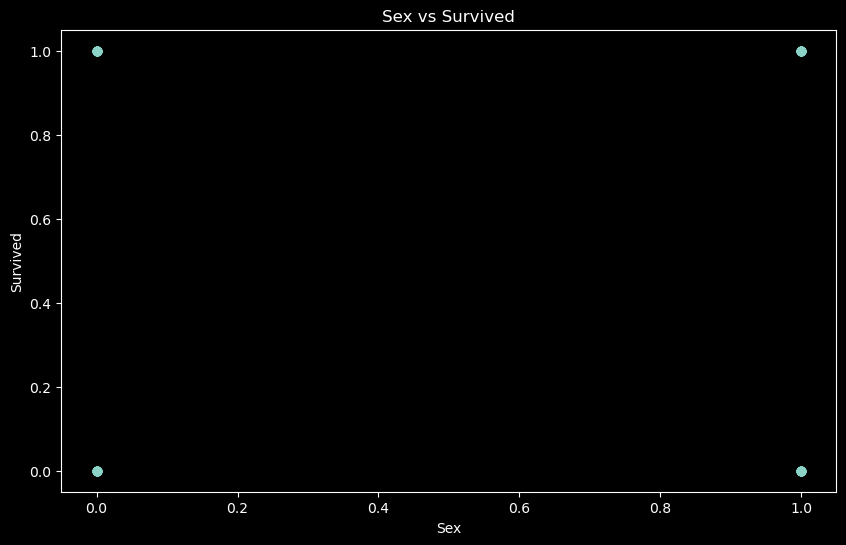

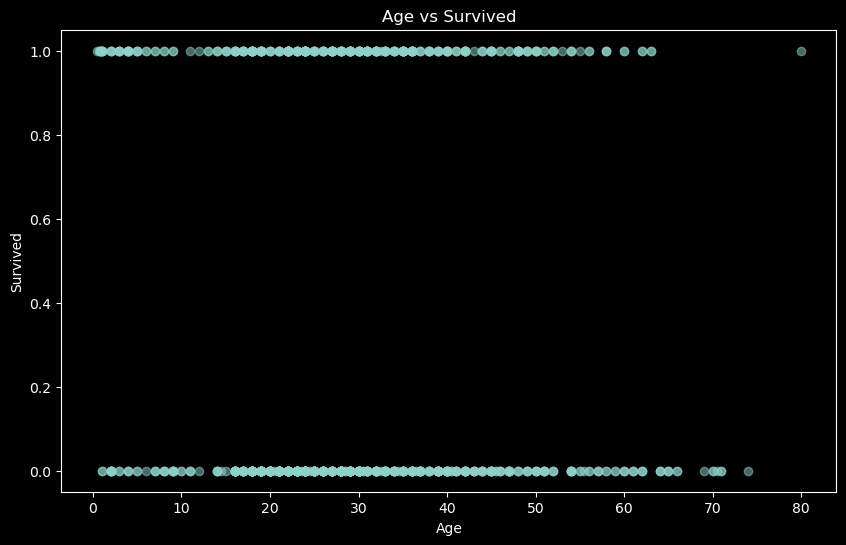

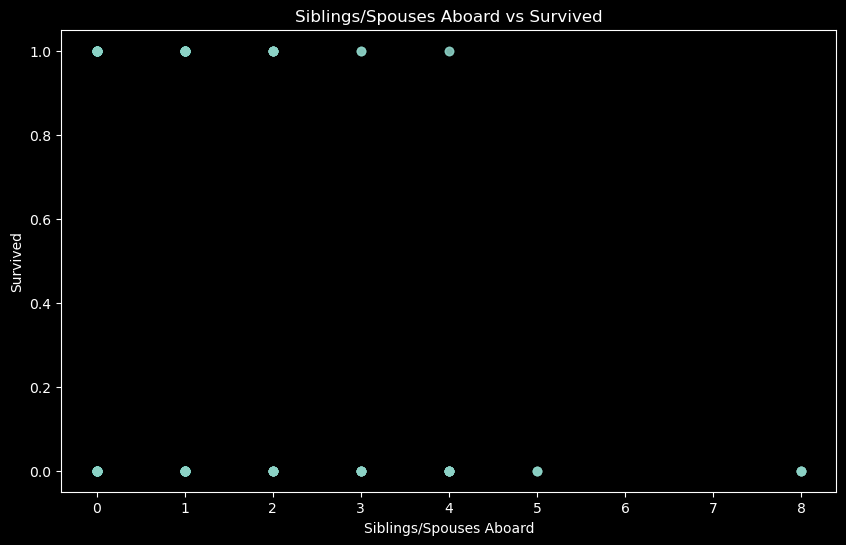

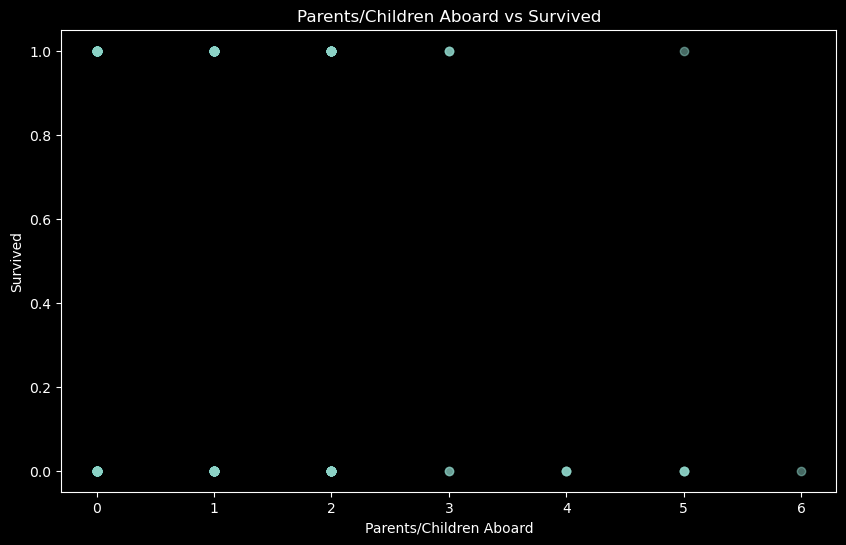

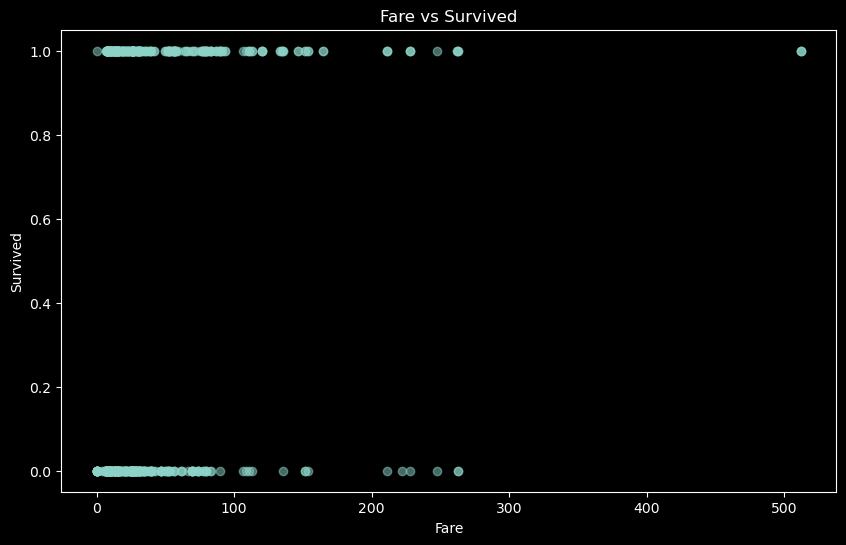

In [180]:
import matplotlib.pyplot as plt

titanic_numeric_clean_df = titanic_df_clean.select_dtypes(include='number')
plot_columns = titanic_numeric_clean_df.columns
plot_columns = plot_columns.drop('Survived')

for col in plot_columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(titanic_numeric_clean_df[col], titanic_numeric_clean_df['Survived'], alpha=0.5)
    plt.title(f'{col} vs Survived')
    plt.xlabel(col)
    plt.ylabel('Survived')
    plt.show()
